In [275]:
import numpy as np
from numpy.linalg import eig
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

### Part c

In [276]:
A = np.array([[2, 6], [5, 1]]).T
A

array([[2, 5],
       [6, 1]])

In [277]:
M = np.mean(A.T, axis=1)
M

array([4., 3.])

In [278]:
C = A - M
C

array([[-2.,  2.],
       [ 2., -2.]])

In [279]:
V = np.cov(C.T)
V

array([[ 8., -8.],
       [-8.,  8.]])

In [280]:
values, vectors = eig(V)

In [281]:
values, vectors

(array([1.60000000e+01, 1.77635684e-15]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [282]:
Y = np.dot(vectors.T, C)
Y

array([[-2.82842712e+00,  2.82842712e+00],
       [ 4.44089210e-16, -4.44089210e-16]])

In [283]:
newMat = (np.dot(vectors, Y) + M).T
newMat

array([[2., 6.],
       [5., 1.]])

In [284]:
mse = np.mean(np.square(newMat - A.T))
mse

4.930380657631324e-32

Yes my calculation match with the code, my calculation gives a perfect 0 mse while my code gives mse which is very very close to 0. The small difference is because of the way numbers are stored in python.

### Part d
assuming d < n

In [285]:
d = 10
n = 1000

In [286]:
mean = np.random.rand(d)
mat = np.random.rand(d, d)
cov = np.dot(mat, mat.T)

In [287]:
X = np.random.multivariate_normal(mean, cov, n).T

In [288]:
X.shape

(10, 1000)

### Part e

In [289]:
def compute_pca(A):
    B = A-A.mean(axis=1)[:, np.newaxis]    # zero mean distribution

    # S = np.cov(B)   # covariance matrix using inbuilt function
    S = B@B.T/A.shape[0]   # covariance matrix

    eigval, eigvec = eig(S)

    # sort eigenvalues (and corresponding eigenvectors) in decreasing order
    idx = eigval.argsort()[::-1]
    eigval = eigval[idx]
    eigvec = eigvec[:, idx]

    # return mean-centered distribution and eigenvectors
    return eigvec


In [290]:
def getEigenvectors(X):
    # M = np.mean(X.T, axis=1)
    C = X-X.mean(axis=1)[:, np.newaxis]
    V = np.cov(C)
    vals, vecs = eig(V)
    list = []
    for i in range(len(vals)):
        list.append((vals[i], vecs[i]))
    list = sorted(list, reverse=True)
    eigenvectors = [i[1] for i in list]
    eigenvectors = np.array(eigenvectors)
    return eigenvectors


### Part f

In [291]:
Xc = X-X.mean(axis=1)[:, np.newaxis]
U = compute_pca(X)
Y = np.matmul(U.T, Xc)

In [292]:
newMat = (np.matmul(U, Y) + X.mean(axis=1)[:, np.newaxis])

In [293]:
mse = np.mean((newMat - X) ** 2)
mse

5.690121444315302e-30

### Part g

In [294]:
from tqdm import tqdm

In [295]:
mseList = []
Xc = X-X.mean(axis=1)[:, np.newaxis]
U = compute_pca(X)
for i in tqdm(range(1, d+1)):
    Up = U[:, :i]
    Yp = np.matmul(Up.T, Xc)
    newMat = (np.matmul(Up, Yp) + X.mean(axis=1)[:, np.newaxis])
    mseList.append(np.mean((newMat - X) ** 2))

100%|██████████| 10/10 [00:00<00:00, 1713.50it/s]


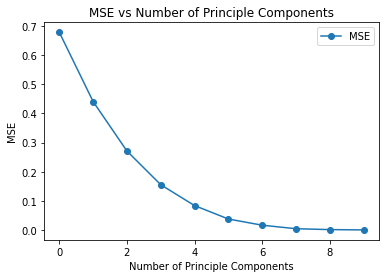

In [296]:
plt.plot(mseList, '-o', label='MSE')
plt.xlabel('Number of Principle Components')
plt.ylabel('MSE')
plt.title('MSE vs Number of Principle Components')
plt.legend()
plt.show()